### Analysis and prediction of Porto Seguro’s Safe Driver Prediction data from Kaggle

download data from the competition page. link - https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
#read the data
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')


In [23]:
y = df[['id', 'target']]
x = df.drop('target', axis=1)


In [10]:
x.describe()
# x['ps_car_12']

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot Correlation Matrix
Plot the correaltion between the features and also print the pairs where correlation is greater than 0.6. 

[('ps_ind_12_bin', 'ps_ind_14'), ('ps_reg_01', 'ps_reg_03'), ('ps_car_12', 'ps_car_13')]


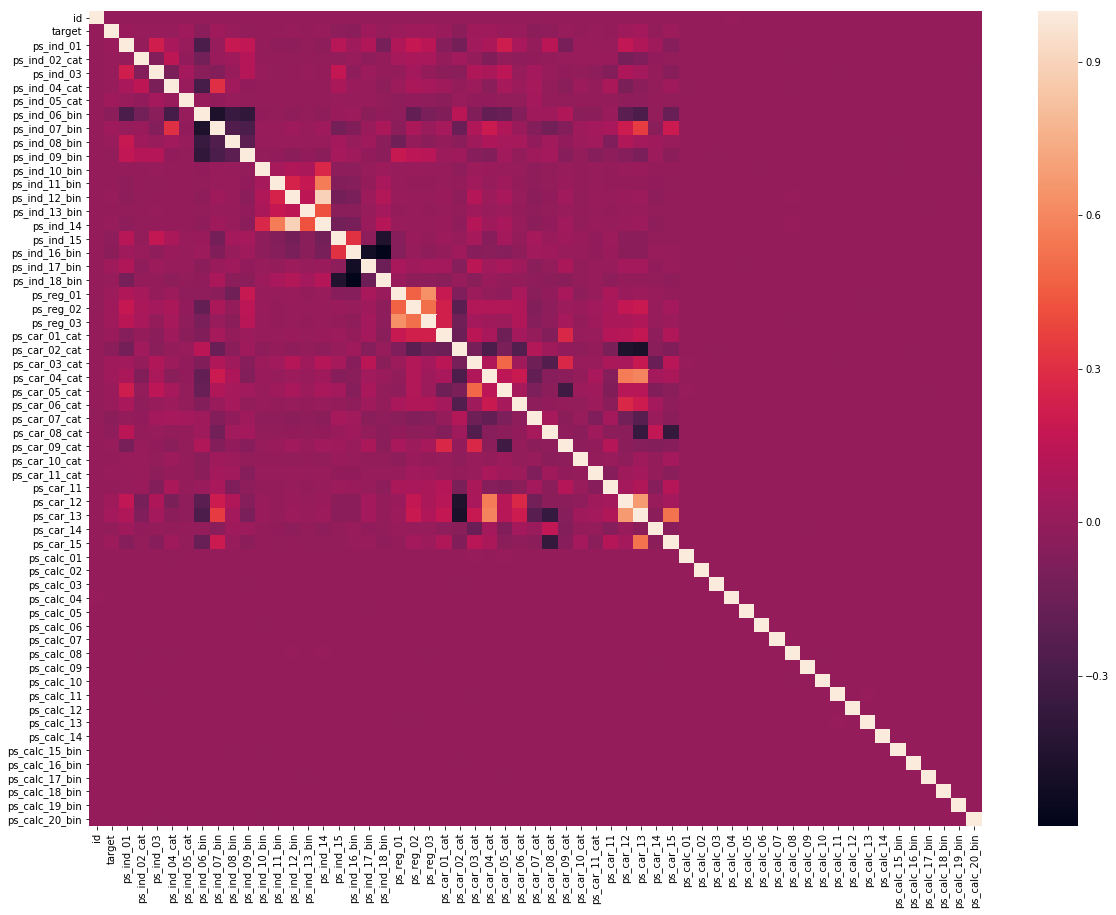

In [5]:

def plot_corr_matrix(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.subplots(figsize=(20,15))
    # calculate the correlation matrix
    corr = df.corr()

    # plot the heatmap
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
    
    corr_matrix = df.corr().abs()
    high_corr_var=np.where(corr_matrix>0.6)
    high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    print(high_corr_var)


plot_corr_matrix(df)

### Now exploring the strongly correlated features by visualizing them 

[
('ps_ind_12_bin', 'ps_ind_14'),
('ps_reg_01', 'ps_reg_03'), 
('ps_car_12', 'ps_car_13')]

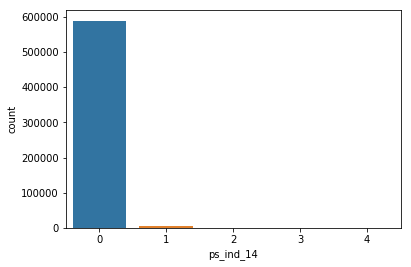

In [6]:
import seaborn as sns
sns.countplot(x=df['ps_ind_14'], data=df[['ps_ind_12_bin']])

[(-0.5, 4.2907622967638481)]

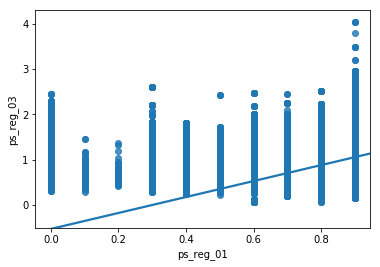

In [15]:

g = sns.regplot(x=df['ps_reg_01'], y=df['ps_reg_03'])
g.set(ylim=(-0.5, None))

[(-0.5, 4.0615704626906055)]

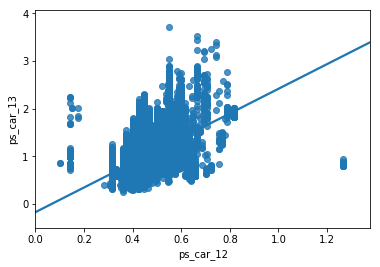

In [13]:
g = sns.regplot(x=df['ps_car_12'], y=df['ps_car_13'])
g.set(xlim=(0, None))
g.set(ylim=(-0.5, None))

### Visualize the missing data information


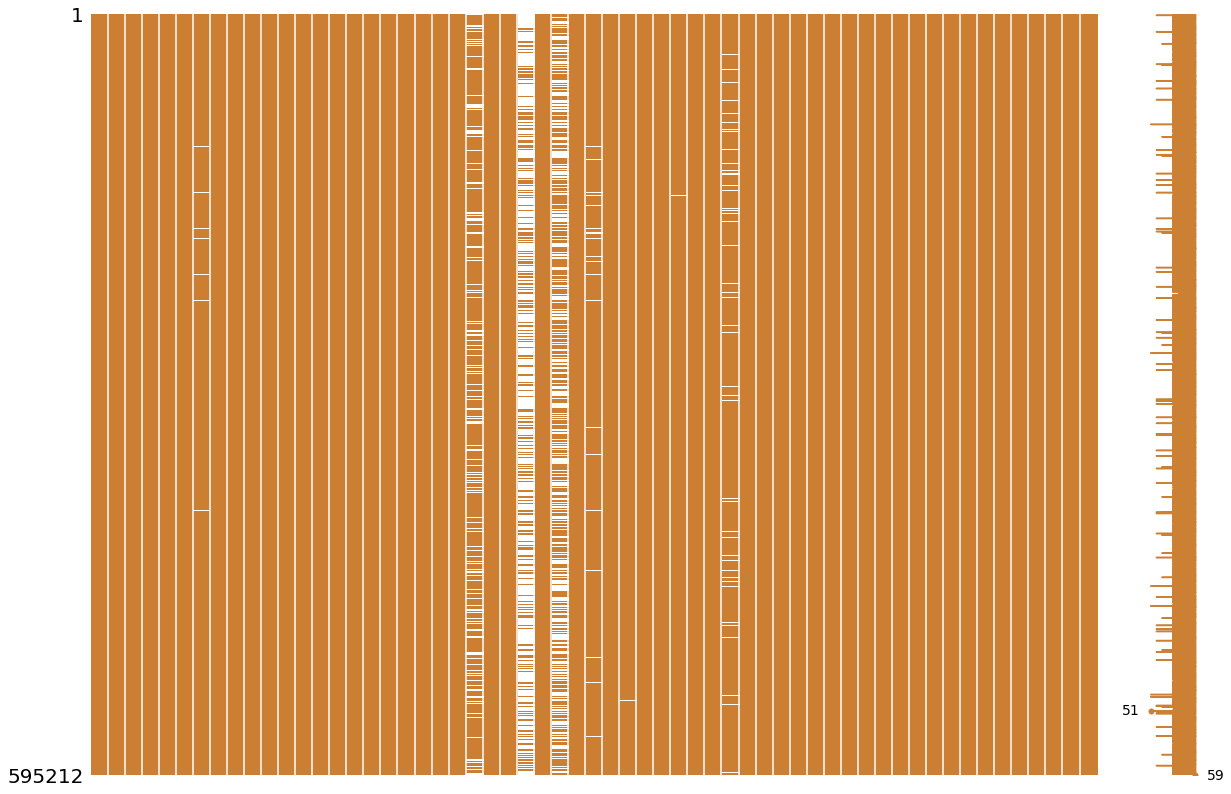

In [16]:
import missingno as msno

train_null = df
train_null = train_null.replace(-1, np.NaN)

msno.matrix(df=train_null.iloc[:, :], figsize=(20, 14), color=(0.8, 0.5, 0.2)) 

In [19]:
# Extract columns with null data
train_null = train_null.loc[:, train_null.isnull().any()]

print(train_null.columns)


Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat',
       'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12',
       'ps_car_14'],
      dtype='object')
